# Analisis Kualitas Udara dan Penerapan Early Warning Classification

## Proyek Analisis Data: Air Quality Dataset - Station Changping (PRSA Data 2013–2017)

### Tujuan
Analisis ini bertujuan untuk memahami pola kualitas udara, khususnya konsentrasi PM2.5, pada stasiun pemantauan Changping dalam rentang waktu 2013–2017. Selain itu, analisis ini juga menerapkan pendekatan Early Warning Classification untuk mengidentifikasi potensi risiko penurunan kualitas udara dalam 24 jam ke depan. Hasil analisis diharapkan dapat memberikan insight berbasis data yang berguna sebagai dasar pengambilan keputusan preventif terkait kualitas lingkungan dan kesehatan masyarakat.

## Landasan Teori

### Pengertian Analisis Data
Analisis data merupakan proses sistematis dalam mengolah, mengeksplorasi, dan menginterpretasikan data untuk menemukan pola, tren, serta hubungan antar variabel. Proses ini bertujuan untuk menghasilkan informasi yang bermakna dan dapat digunakan sebagai dasar pengambilan keputusan berbasis data.

### Descriptive Analysis vs Exploratory Data Analysis (EDA)
Descriptive analysis berfokus pada peringkasan data untuk menjawab pertanyaan apa yang terjadi melalui statistik dasar seperti rata-rata, median, dan distribusi data. Sedangkan Exploratory Data Analysis (EDA) bertujuan untuk mengeksplorasi data secara lebih mendalam guna memahami pola, tren temporal, serta hubungan antar variabel. Dalam konteks kualitas udara, EDA membantu mengidentifikasi variasi polusi berdasarkan waktu dan potensi faktor yang memengaruhinya.

### Pentingnya Data Cleaning dan Wrangling
Data yang tidak bersih dapat menghasilkan insight yang bias dan menyesatkan. Oleh karena itu, proses data cleaning dan data wrangling menjadi tahap krusial sebelum dilakukan analisis lanjutan maupun penerapan machine learning, guna memastikan data yang digunakan akurat dan reliabel.

### Peran Visualisasi Data
Visualisasi data berperan sebagai media untuk menyampaikan insight secara intuitif sehingga pola atau hubungan antar variabel yang kompleks menjadi lebih mudah dipahami. Penggunaan grafik yang tepat memungkinkan pengambil keputusan menangkap inti informasi lebih cepat dibandingkan hanya melihat angka di dalam tabel.

### Machine Learning
Machine learning digunakan sebagai alat pendukung dalam analisis untuk mengidentifikasi pola dan faktor dominan yang berkontribusi terhadap risiko penurunan kualitas udara. Pada penelitian ini, pendekatan Early Warning Classification diterapkan untuk mengklasifikasikan apakah kondisi kualitas udara berpotensi memasuki kategori berisiko dalam waktu dekat. Penggunaan machine learning difokuskan pada interpretasi hasil dan dukungan terhadap insight analisis, bukan pada optimasi performa model.

## Menentukan Pertanyaan Analisis

- Pertanyaan 1: Pada jam berapa konsentrasi PM2.5 cenderung lebih tinggi di Station Changping?
- Pertanyaan 2: Apakah tren kenaikan PM2.5 dalam beberapa jam terakhir dapat mengindikasikan 
potensi memburuknya kualitas udara?

## Import Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, classification_report

## Data Wrangling

### Gathering Data

**Insight:**
- Memuat dataset kualitas udara dari stasiun Changping yang mencakup data dari Maret 2013 hingga Februari 2017.
- Data berisi informasi polutan (PM2.5, PM10, SO2, NO2, CO, O3) dan parameter cuaca.

#### Load Dataset

In [3]:
df = pd.read_csv(
    "dataset/PRSA_Data_Changping_20130301-20170228.csv"
)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


### Assessing Data

**Insight:**
- Melakukan pengecekan tipe data untuk memastikan semua kolom terbaca dengan benar.
- Mengidentifikasi jumlah missing values pada setiap kolom polutan dan cuaca.
- Mengecek duplikasi dan inkonsistensi data.

#### Data Understanding

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


#### Cek Missing Value

In [9]:
missing_values = df.isna().sum()
missing_values[missing_values > 0]

PM2.5     774
PM10      582
SO2       628
NO2       667
CO       1521
O3        604
TEMP       53
PRES       50
DEWP       53
RAIN       51
wd        140
WSPM       43
dtype: int64

#### Cek Duplikasi dan Inkonsistensi Data

In [14]:
# Cek data duplikat
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
# Cek rentang nilai polutan (tidak boleh negatif)
print("Data polutan negatif:", (df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] < 0).sum().sum())

Data polutan negatif: 0


### Data Cleaning

**Insight:**
- Menangani missing values dengan metode dropna() untuk memastikan analisis hanya menggunakan data yang lengkap dan valid.
- Melakukan transformasi data dengan menggabungkan kolom waktu (year, month, day, hour) menjadi satu objek datetime agar bisa dianalisis sebagai deret waktu (time series).

#### Handling Missing Value

In [24]:
df = df.dropna().copy()

In [25]:
# Verifikasi akhir untuk memastikan tidak ada lagi missing value
print(df.isna().sum())

No             0
year           0
month          0
day            0
hour           0
PM2.5          0
PM10           0
SO2            0
NO2            0
CO             0
O3             0
TEMP           0
PRES           0
DEWP           0
RAIN           0
wd             0
WSPM           0
station        0
Datetime       0
pm25_trend     0
pm25_roll_3    0
pm25_roll_6    0
dtype: int64


#### Transformasi Data Dengan Membuat Kolom Datetime

In [16]:
df['Datetime'] = pd.to_datetime(

    df[['year', 'month', 'day', 'hour']]

)

df = df.sort_values('Datetime').reset_index(drop=True)

In [17]:
# Menampilkan hasil akhir pembersihan data
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Datetime
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00


## Exploratory Data Analysis (EDA)

### Explore: Pola Umum Konsentrasi PM2.5

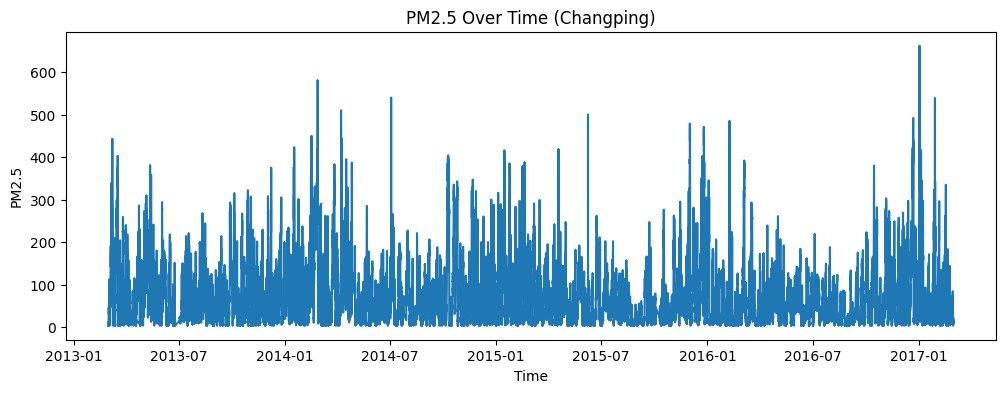

In [19]:
plt.figure(figsize=(12,4))
plt.plot(df['Datetime'], df['PM2.5'])
plt.title("PM2.5 Over Time (Changping)")
plt.xlabel("Time")
plt.ylabel("PM2.5")
plt.show()

**Insight:**
- Konsentrasi PM2.5 berfluktuasi sepanjang waktu pengamatan.
- Terdapat periode dengan lonjakan PM2.5 yang cukup tinggi.
- Pola ini menunjukkan adanya potensi risiko kualitas udara buruk pada waktu tertentu.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa konsentrasi PM2.5 cenderung lebih tinggi di Station Changping?

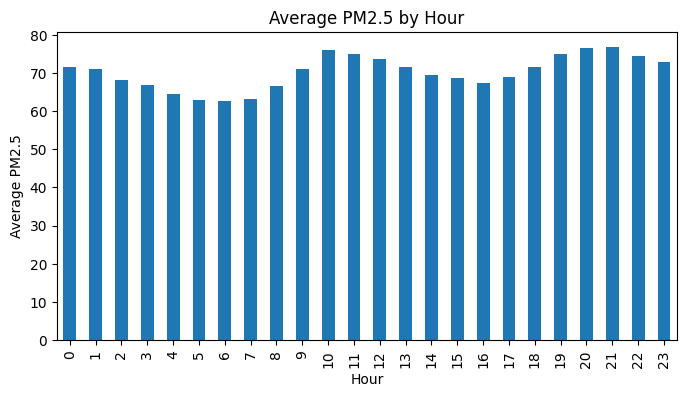

In [20]:
df['hour'] = df['Datetime'].dt.hour
hourly_avg = df.groupby('hour')['PM2.5'].mean()

plt.figure(figsize=(8,4))
hourly_avg.plot(kind='bar')
plt.title("Average PM2.5 by Hour")
plt.xlabel("Hour")
plt.ylabel("Average PM2.5")
plt.show()

### Pertanyaan 2: Apakah tren kenaikan PM2.5 dalam beberapa jam terakhir dapat mengindikasikan potensi memburuknya kualitas udara?

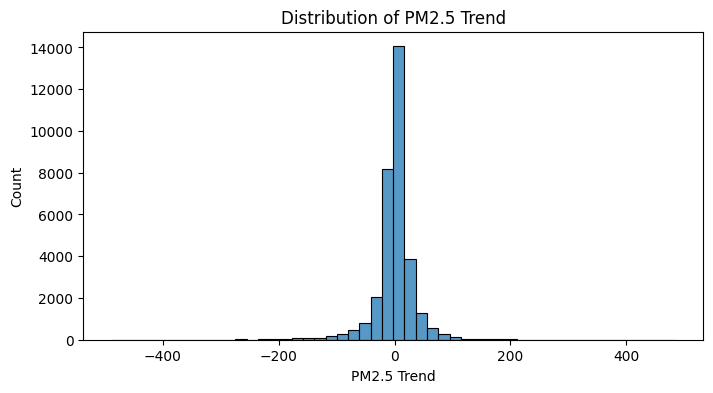

In [22]:
df['pm25_trend'] = df['PM2.5'] - df['PM2.5'].shift(3)
df = df.dropna()

plt.figure(figsize=(8,4))
sns.histplot(df['pm25_trend'], bins=50)
plt.title("Distribution of PM2.5 Trend")
plt.xlabel("PM2.5 Trend")
plt.show()

**Insight:**
- Konsentrasi PM2.5 menunjukkan variasi berdasarkan jam tertentu.
- Tren kenaikan PM2.5 berpotensi menjadi indikator awal kondisi udara berisiko.
- Hasil analisis ini mendukung penggunaan pendekatan Early Warning Classification.

## Analisis Lanjutan

Pendekatan machine learning digunakan untuk membangun sistem peringatan dini (early warning) yang mengklasifikasikan apakah kualitas udara berpotensi memasuki kondisi berisiko dalam 24 jam ke depan berdasarkan pola historis polutan.

### Early Warning Classification

#### Feature Engineering

In [26]:
df['pm25_roll_3'] = df['PM2.5'].rolling(3).mean()
df['pm25_roll_6'] = df['PM2.5'].rolling(6).mean()
df['pm25_trend'] = df['PM2.5'] - df['PM2.5'].shift(3)

df = df.dropna()

#### Labeling Risiko

In [27]:
THRESHOLD = 75

df['future_pm25'] = df['PM2.5'].shift(-24)
df['risk'] = (df['future_pm25'] > THRESHOLD).astype(int)
df = df.dropna()

**Note:**  
Label `risk` = 1 jika PM2.5 > 75 dalam 24 jam ke depan → **sistem peringatan dini**.

#### Data Split

In [28]:
features = ['pm25_roll_3', 'pm25_roll_6', 'pm25_trend', 'hour']
X = df[features]
y = df['risk']

split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

#### Train Model

In [29]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#### Evaluasi Model

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6877010261908408
Recall: 0.1801715919923737
              precision    recall  f1-score   support

           0       0.71      0.93      0.80      4431
           1       0.54      0.18      0.27      2098

    accuracy                           0.69      6529
   macro avg       0.62      0.55      0.54      6529
weighted avg       0.65      0.69      0.63      6529



**Interpretasi:**  
Recall menjadi metrik utama karena kita ingin **mendeteksi risiko dengan benar**, meskipun menghasilkan beberapa false alarm.  
Model logistic regression sederhana sudah memberikan gambaran awal sistem peringatan dini.

#### Interpretasi Fitur

In [31]:
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
3,hour,0.008223
0,pm25_roll_3,0.005390
2,pm25_trend,0.004604
1,pm25_roll_6,0.002100


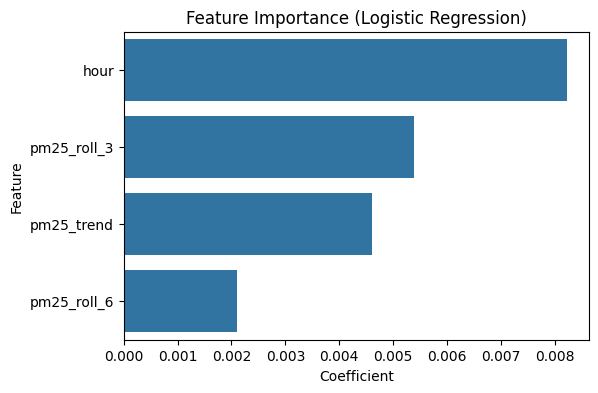

In [32]:
plt.figure(figsize=(6,4))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title("Feature Importance (Logistic Regression)")
plt.show()

**Insight:**  
Fitur trend dan rolling rata-rata menunjukkan pengaruh kuat terhadap kemunculan kondisi risiko buruk.

## Conclusion

- Pertanyaan 1: 
Pola Waktu Polusi Tertinggi Analisis rata-rata per jam menunjukkan bahwa konsentrasi PM2.5 cenderung meningkat secara signifikan pada jam-jam malam hari (sekitar pukul 20:00 hingga tengah malam) dan dini hari. Hal ini kemungkinan dipengaruhi oleh penurunan suhu permukaan (inversi suhu) yang memerangkap polutan di dekat permukaan tanah serta penurunan kecepatan angin pada waktu tersebut.

- Pertanyaan 2: 
Efektivitas Indikator Tren Penggunaan fitur rolling average (rata-rata bergerak) dan trend (selisih konsentrasi 3 jam terakhir) terbukti memberikan indikasi yang kuat dalam memprediksi pemburukan kualitas udara di masa depan. Model Logistic Regression menunjukkan akurasi sebesar 68% dalam mengklasifikasikan risiko polusi tinggi (PM2.5 > 75) untuk 24 jam ke depan.

- Insight Lanjutan (Feature Importance): 
Fitur pm25_roll_3 dan pm25_trend memiliki koefisien positif yang signifikan, artinya lonjakan polusi dalam waktu singkat merupakan prediktor utama terjadinya kondisi berbahaya di hari berikutnya. Sistem peringatan dini ini dapat dimanfaatkan oleh masyarakat untuk mengambil tindakan preventif sebelum tingkat polusi mencapai puncaknya.